# Introduction to the xgbsurv package - Breslow

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [2]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

Values are being sorted!
Values are being sorted!


## Load Model

In [3]:
model = XGBSurv(n_estimators=100, objective="breslow_objective",
                                             eval_metric="breslow_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function breslow_likelihood at 0x2b6d93ba0>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function breslow_objective at 0x2b6da91c0>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-breslow_likelihood:6.39154
[1]	validation_0-breslow_likelihood:6.29171
[2]	validation_0-breslow_likelihood:6.23933
[3]	validation_0-breslow_likelihood:6.18378
[4]	validation_0-breslow_likelihood:6.13789
[5]	validation_0-breslow_likelihood:6.09657
[6]	validation_0-breslow_likelihood:6.05241
[7]	validation_0-breslow_likelihood:6.03064
[8]	validation_0-breslow_likelihood:5.98344
[9]	validation_0-breslow_likelihood:5.94991
[10]	validation_0-breslow_likelihood:5.92966
[11]	validation_0-breslow_likelihood:5.92142
[12]	validation_0-breslow_likelihood:5.88774
[13]	validation_0-breslow_likelihood:5.87049
[14]	validation_0-breslow_likelihood:5.82993
[15]	validation_0-breslow_likelihood:5.81171
[16]	validation_0-breslow_likelihood:5.79779
[17]	validation_0-breslow_likelihood:5.78524
[18]	validation_0-breslow_likelihood:5.76378
[19]	validation_0-breslow_likelihood:5.74106
[20]	validation_0-breslow_likelihood:5.73111
[21]	validation_0-breslow_likelihood:5.72677
[22]	validation_0-br

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function breslow_likelihood at 0x2b6d93ba0>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function breslow_objective at 0x2b6da91c0>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
335.600006,151.540846,72.720338,5.652612,15.041346,74.852594,44.493194,7.885862,20.772466,69.919324,362.131636,...,5.788926,1.285801,2.260201,31.824238,2.924198,14.807779,49.437517,15.305214,16.365364,6.845888
351.000000,191.056376,91.682768,7.126578,18.963502,94.371028,56.095163,9.942166,26.189058,88.151367,456.560459,...,7.298436,1.621084,2.849567,40.122671,3.686707,18.669030,62.328759,19.296176,20.632768,8.631010
355.200012,191.056376,91.682768,7.126578,18.963502,94.371028,56.095163,9.942166,26.189058,88.151367,456.560459,...,7.298436,1.621084,2.849567,40.122671,3.686707,18.669030,62.328759,19.296176,20.632768,8.631010


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
335.600006,1.536905e-66,2.617934e-32,0.003508,2.935123e-07,3.104069e-33,4.751724e-20,0.000376,9.519910e-10,4.309466e-31,5.348462e-158,...,0.003061,0.276429,0.104329,1.509764e-14,0.053708,3.707347e-07,3.385003e-22,2.254394e-07,7.809313e-08,0.001064
351.000000,1.059912e-83,1.522929e-40,0.000803,5.811066e-09,1.035579e-41,4.346905e-25,0.000048,4.228990e-12,5.204126e-39,5.227714e-199,...,0.000677,0.197684,0.057869,3.757900e-18,0.025054,7.800874e-09,8.530289e-28,4.166557e-09,1.094719e-09,0.000178
355.200012,1.059912e-83,1.522929e-40,0.000803,5.811066e-09,1.035579e-41,4.346905e-25,0.000048,4.228990e-12,5.204126e-39,5.227714e-199,...,0.000677,0.197684,0.057869,3.757900e-18,0.025054,7.800874e-09,8.530289e-28,4.166557e-09,1.094719e-09,0.000178


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard Breslow')

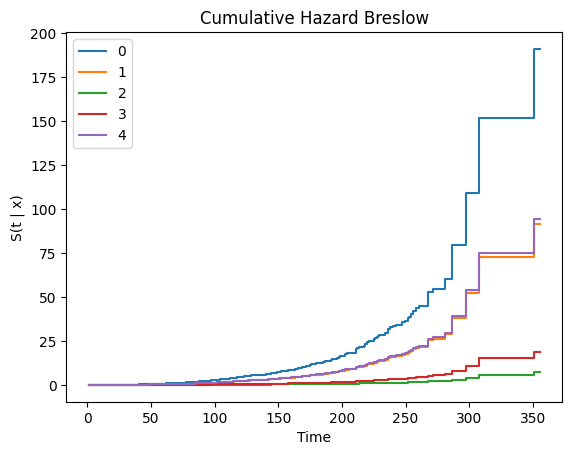

In [11]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard Breslow")

Text(0.5, 1.0, 'Survival Curve Breslow')

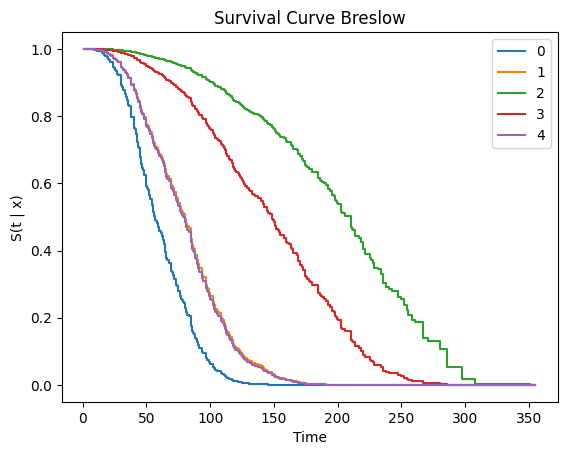

In [12]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve Breslow")

## Evaluate

### Test

In [13]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.6419597510214993


In [14]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.20830603995710714
